Importing Necessary Libraries

In [103]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers, optimizers

Load MNIST Dataset

In [104]:
from tensorflow.keras.datasets import mnist

In [105]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [106]:
X_train.shape,X_test.shape # There are 60000 images of size 28*28

((60000, 28, 28), (10000, 28, 28))

In [107]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [108]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

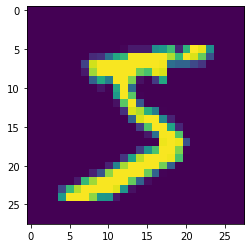

In [109]:
plt.imshow(X_train[0,:,:])

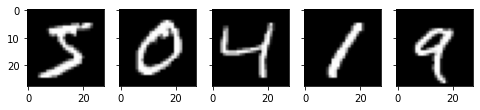

In [110]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(8, 8))
for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
plt.show()

In [111]:
y_train[0] #The output label for the image shown above

5

reshaping images for one dimensional

In [112]:
x_train = X_train.reshape(60000,28*28)
x_test = X_test.reshape(10000,28*28)

In [113]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

scaling the images

In [114]:
x_train = x_train/255.
x_test = x_test/255.

Encoding the target levels

In [115]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes =10)

In [116]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Building the model with Relu Activation Function with  hidden Layer

In [117]:
model = Sequential()
model.add(Dense(units= 256,activation='relu',input_dim = 784 ))
model.add(Dense(units = 10,activation='softmax' ))


In [118]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

In [119]:
model.fit(x_train,y_train,epochs = 10,batch_size = 1000,verbose=1,validation_data=(x_test, y_test))

Epoch 1/10
60/60 [==============================] - 2s 36ms/step - loss: 2.0337 - accuracy: 0.3774 - val_loss: 1.7740 - val_accuracy: 0.6092
Epoch 2/10
60/60 [==============================] - 1s 21ms/step - loss: 1.5878 - accuracy: 0.6795 - val_loss: 1.3856 - val_accuracy: 0.7356
Epoch 3/10
60/60 [==============================] - 1s 21ms/step - loss: 1.2643 - accuracy: 0.7588 - val_loss: 1.1157 - val_accuracy: 0.7877
Epoch 4/10
60/60 [==============================] - 1s 21ms/step - loss: 1.0442 - accuracy: 0.7944 - val_loss: 0.9357 - val_accuracy: 0.8136
Epoch 5/10
60/60 [==============================] - 1s 21ms/step - loss: 0.8960 - accuracy: 0.8149 - val_loss: 0.8136 - val_accuracy: 0.8305
Epoch 6/10
60/60 [==============================] - 1s 21ms/step - loss: 0.7933 - accuracy: 0.8283 - val_loss: 0.7271 - val_accuracy: 0.8446
Epoch 7/10
60/60 [==============================] - 1s 21ms/step - loss: 0.7192 - accuracy: 0.8392 - val_loss: 0.6637 - val_accuracy: 0.8534
Epoch 8/10
60

In [120]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 256)               200960    
                                                                 
 dense_118 (Dense)           (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [121]:
loss = model.evaluate(x_test,y_test,batch_size=1000)

10/10 [==============================] - 0s 10ms/step - loss: 0.5466 - accuracy: 0.8731


Building the model with Sigmoid activation Function with 1 hidden Layer

In [122]:
model2 = Sequential()
model2.add(Dense(units= 256,activation='sigmoid',input_dim = 784 ))
model2.add(Dense(units = 10,activation='softmax' ))


In [123]:
model2.compile(loss = 'categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

In [124]:
model2.fit(x_train,y_train,epochs = 10,batch_size = 1000,verbose=1,validation_data=(x_test, y_test))

Epoch 1/10
60/60 [==============================] - 2s 24ms/step - loss: 2.2690 - accuracy: 0.2124 - val_loss: 2.2044 - val_accuracy: 0.3159
Epoch 2/10
60/60 [==============================] - 1s 21ms/step - loss: 2.1670 - accuracy: 0.3980 - val_loss: 2.1193 - val_accuracy: 0.4849
Epoch 3/10
60/60 [==============================] - 1s 21ms/step - loss: 2.0853 - accuracy: 0.5295 - val_loss: 2.0373 - val_accuracy: 0.5928
Epoch 4/10
60/60 [==============================] - 1s 21ms/step - loss: 2.0064 - accuracy: 0.6028 - val_loss: 1.9582 - val_accuracy: 0.6401
Epoch 5/10
60/60 [==============================] - 1s 21ms/step - loss: 1.9299 - accuracy: 0.6426 - val_loss: 1.8817 - val_accuracy: 0.6664
Epoch 6/10
60/60 [==============================] - 1s 21ms/step - loss: 1.8559 - accuracy: 0.6667 - val_loss: 1.8074 - val_accuracy: 0.6970
Epoch 7/10
60/60 [==============================] - 1s 21ms/step - loss: 1.7840 - accuracy: 0.6906 - val_loss: 1.7356 - val_accuracy: 0.7072
Epoch 8/10
60

In [125]:
loss = model2.evaluate(x_test,y_test,batch_size=1000)

10/10 [==============================] - 0s 10ms/step - loss: 1.5359 - accuracy: 0.7473


Comparing Relu and Sigmoid Activation Function We select Relu activation function which gave better Results.

* Another metod we define a function and try various parameters such as Learning rate and lambda

In [126]:
def train_test_model(itr,lr,lamda):
    
    iterations=itr
    learning_rate=lr
    
    
    model3=Sequential()
    model3.add(Dense(units=256,activation='relu',input_dim=784))
    model3.add(Dense(units=10,activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    
    sgd=optimizers.SGD(lr=learning_rate)
    model3.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    
    model3.fit(x_train,y_train,epochs=iterations,batch_size=1000,verbose=1)
    [loss,score_train]=model3.evaluate(x_train,y_train)
    [loss,score_test]=model3.evaluate(x_test,y_test)
    
    return score_train,score_test

Different Learning Rate and Lamba has been choosen to find best one 

In [127]:
lr=[0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5]
lamda=[0.0001,0.001,0.01,0.01,0.01,0.0001,0.0001,1]
for i,j in zip(lr,lamda):
    score=train_test_model(10,i,j)
    print('epocs:',10,'train_accuracy:',score[0],'test_accuracy:',score[1],'alpha:', i,'Regularization:',j)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


60/60 [==============================] - 2s 20ms/step - loss: 2.4160 - accuracy: 0.0707
Epoch 2/10
60/60 [==============================] - 1s 19ms/step - loss: 2.4076 - accuracy: 0.0733
Epoch 3/10
60/60 [==============================] - 1s 19ms/step - loss: 2.3993 - accuracy: 0.0762
Epoch 4/10
60/60 [==============================] - 1s 19ms/step - loss: 2.3911 - accuracy: 0.0787
Epoch 5/10
60/60 [==============================] - 1s 19ms/step - loss: 2.3831 - accuracy: 0.0824
Epoch 6/10
60/60 [==============================] - 1s 19ms/step - loss: 2.3752 - accuracy: 0.0861
Epoch 7/10
60/60 [==============================] - 1s 19ms/step - loss: 2.3675 - accuracy: 0.0903
Epoch 8/10
60/60 [==============================] - 1s 19ms/step - loss: 2.3599 - accuracy: 0.0942
Epoch 9/10
60/60 [==============================] - 1s 19ms/step - loss: 2.3523 - accuracy: 0.0985
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3343 - accuracy: 0.1107
epocs: 10 train_acc

As we can see that Alpha = 0.4 and Regularization Parameter = 0.0001 gave better results

We build the model with obtained parameters 

In [128]:
model4=Sequential()
model4.add(Dense(units=256,activation='relu',input_dim=784))
model4.add(Dense(units=10,activation='softmax',kernel_regularizer=regularizers.l2(0.0001)))

In [129]:
sgd=optimizers.SGD(lr=0.4)
model4.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
history = model4.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


60/60 [==============================] - 2s 20ms/step - loss: 0.6553 - accuracy: 0.8090
Epoch 2/10
60/60 [==============================] - 1s 19ms/step - loss: 0.3190 - accuracy: 0.9097
Epoch 3/10
60/60 [==============================] - 1s 19ms/step - loss: 0.2658 - accuracy: 0.9261
Epoch 4/10
60/60 [==============================] - 1s 19ms/step - loss: 0.2320 - accuracy: 0.9358
Epoch 5/10
60/60 [==============================] - 1s 19ms/step - loss: 0.2072 - accuracy: 0.9435
Epoch 6/10
60/60 [==============================] - 1s 19ms/step - loss: 0.1884 - accuracy: 0.9493
Epoch 7/10
60/60 [==============================] - 1s 19ms/step - loss: 0.1731 - accuracy: 0.9536
Epoch 8/10
60/60 [==============================] - 1s 19ms/step - loss: 0.1605 - accuracy: 0.9572
Epoch 9/10
60/60 [==============================] - 1s 19ms/step - loss: 0.1498 - accuracy: 0.9600
Epoch 10/10
60/60 [==============================] - 1s 19ms/step - loss: 0.1404 - accuracy: 0.9631


In [130]:
model4.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 256)               200960    
                                                                 
 dense_138 (Dense)           (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [131]:
from keras.utils.vis_utils import plot_model

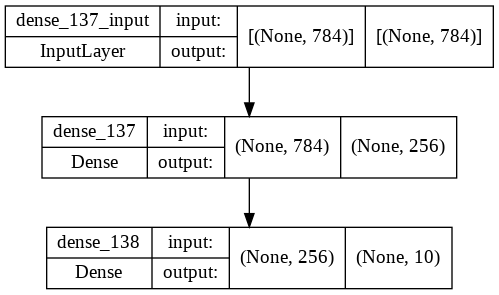

In [132]:
plot_model(model4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [133]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

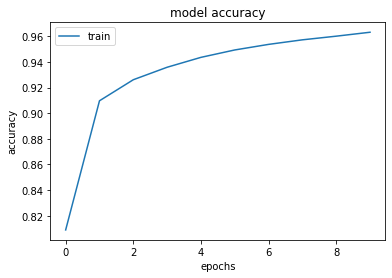

In [134]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

Plot showing Loss vs epochs

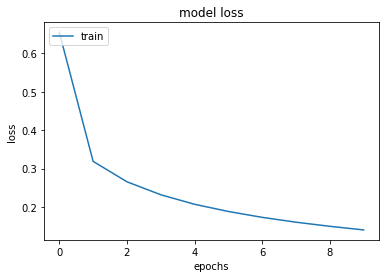

In [135]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

In [136]:
y_pred = model4.predict(x_test, verbose=0)
y_pred

array([[7.8335084e-05, 7.6674576e-07, 1.2137069e-03, ..., 9.9519122e-01,
        5.0757699e-05, 2.1599162e-04],
       [1.8278103e-04, 3.2204243e-05, 9.8802918e-01, ..., 8.2820029e-10,
        5.6553876e-04, 2.5184468e-09],
       [2.3776236e-05, 9.8543948e-01, 3.6627327e-03, ..., 4.7663529e-03,
        1.8256590e-03, 2.1070577e-04],
       ...,
       [8.6059828e-08, 6.1349411e-08, 1.9922807e-06, ..., 4.2672298e-05,
        9.8900485e-04, 1.4731635e-03],
       [9.7297889e-05, 9.9635072e-05, 3.5908772e-05, ..., 4.2574029e-06,
        1.0450433e-02, 5.3204089e-06],
       [4.0301344e-05, 1.0474528e-08, 8.4683226e-05, ..., 5.5214650e-10,
        3.3725419e-07, 6.1182071e-08]], dtype=float32)

In [137]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [138]:
from sklearn.metrics import classification_report

In [139]:
from sklearn.metrics import confusion_matrix

In [140]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(y_pred,axis=1)
print(confusion_matrix(y_test_arg, Y_pred))

[[ 969    0    1    1    1    2    4    1    1    0]
 [   0 1116    3    2    0    1    4    2    7    0]
 [   7    2  994    5    5    1    3    7    7    1]
 [   1    1    6  975    0    6    0    8   11    2]
 [   1    0    5    1  948    0    7    2    3   15]
 [   9    1    1   14    2  842    9    1    8    5]
 [   9    3    1    1    6    8  924    1    5    0]
 [   1   11   16    4    3    1    0  983    1    8]
 [   4    2    2   11    4    5    9    6  928    3]
 [   9    7    1   12   23    4    1   10    8  934]]


In [141]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.97      0.94      0.96       892
           6       0.96      0.96      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.93      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



F1 Score of the Model

In [142]:
f1 = f1_score(y_test_arg, Y_pred,average='micro')
print('F1 Score is: ',f1)

F1 Score is:  0.9613
